In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('/DATA/yolov8l.csv')
df2 = pd.read_csv('/DATA/yolov8m.csv')
df3 = pd.read_csv('/DATA/yolov8s.csv')


df_all = pd.concat((df1, df2, df3))
df_all

,Test_num,param,gpu,FLOPS,class_num,t_img_num,t_instance_num,v_img_num,v_instance_num,imgsz,batch,epoch,time,elapsed,remaining,gpu_usage,cpu_usage
0,0,43643718,Tesla V100-PCIE-32GB,1.400000e+13,18,100,238,100,235,640,1,0,0.000000,0.000000,0,0.000000,0.000000
1,0,43643718,Tesla V100-PCIE-32GB,1.400000e+13,18,100,238,100,235,640,1,1,124.553649,124.553649,12330,1.717300,1.106000
2,0,43643718,Tesla V100-PCIE-32GB,1.400000e+13,18,100,238,100,235,640,1,2,124.532138,249.064276,12203,1.728550,1.083000
3,0,43643718,Tesla V100-PCIE-32GB,1.400000e+13,18,100,238,100,235,640,1,3,124.218239,372.654717,12037,1.732300,1.068333
4,0,43643718,Tesla V100-PCIE-32GB,1.400000e+13,18,100,238,100,235,640,1,4,124.083619,496.334475,11897,1.734175,1.047750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,5,11142566,Tesla V100-PCIE-32GB,1.400000e+13,18,100,238,100,235,640,32,96,7.629245,732.407515,28,7.893932,26.638542
602,5,11142566,Tesla V100-PCIE-32GB,1.400000e+13,18,100,238,100,235,640,32,97,7.617981,738.944192,20,7.893763,27.380928
603,5,11142566,Tesla V100-PCIE-32GB,1.400000e+13,18,100,238,100,235,640,32,98,7.604365,745.227784,13,7.893597,28.098724
604,5,11142566,Tesla V100-PCIE-32GB,1.400000e+13,18,100,238,100,235,640,32,99,7.593632,751.769525,6,7.893434,28.520455


In [3]:
gpu_dummies = pd.get_dummies(df_all['gpu'])
df_all = pd.concat((df_all, gpu_dummies), axis=1)
df = df_all.drop(['Test_num', 'gpu', 'class_num', 'remaining', 'gpu_usage', 'cpu_usage'], axis=1)
df

,param,FLOPS,t_img_num,t_instance_num,v_img_num,v_instance_num,imgsz,batch,epoch,time,elapsed,Tesla V100-PCIE-32GB
0,43643718,1.400000e+13,100,238,100,235,640,1,0,0.000000,0.000000,True
1,43643718,1.400000e+13,100,238,100,235,640,1,1,124.553649,124.553649,True
2,43643718,1.400000e+13,100,238,100,235,640,1,2,124.532138,249.064276,True
3,43643718,1.400000e+13,100,238,100,235,640,1,3,124.218239,372.654717,True
4,43643718,1.400000e+13,100,238,100,235,640,1,4,124.083619,496.334475,True
...,...,...,...,...,...,...,...,...,...,...,...,...
601,11142566,1.400000e+13,100,238,100,235,640,32,96,7.629245,732.407515,True
602,11142566,1.400000e+13,100,238,100,235,640,32,97,7.617981,738.944192,True
603,11142566,1.400000e+13,100,238,100,235,640,32,98,7.604365,745.227784,True
604,11142566,1.400000e+13,100,238,100,235,640,32,99,7.593632,751.769525,True


array([[<Axes: title={'center': 'Test_num'}>,
        <Axes: title={'center': 'param'}>,
        <Axes: title={'center': 'FLOPS'}>,
        <Axes: title={'center': 'class_num'}>],
       [<Axes: title={'center': 't_img_num'}>,
        <Axes: title={'center': 't_instance_num'}>,
        <Axes: title={'center': 'v_img_num'}>,
        <Axes: title={'center': 'v_instance_num'}>],
       [<Axes: title={'center': 'imgsz'}>,
        <Axes: title={'center': 'batch'}>,
        <Axes: title={'center': 'epoch'}>,
        <Axes: title={'center': 'time'}>],
       [<Axes: title={'center': 'elapsed'}>,
        <Axes: title={'center': 'remaining'}>,
        <Axes: title={'center': 'gpu_usage'}>,
        <Axes: title={'center': 'cpu_usage'}>]], dtype=object)

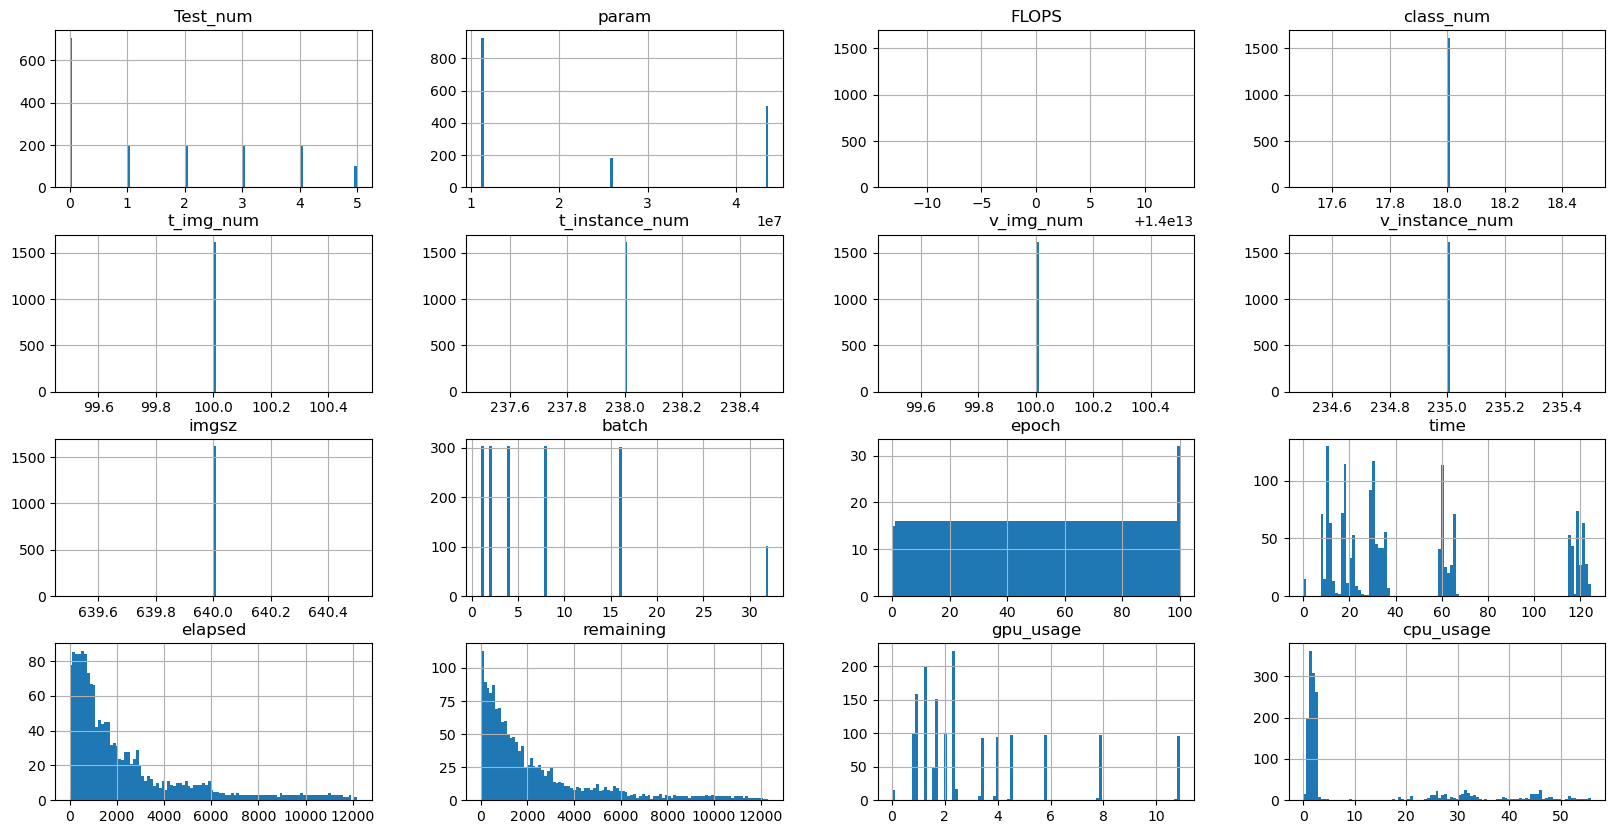

In [23]:
df_all.hist(bins=100, figsize=(20, 10))

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

input_data = df.drop('elapsed', axis=1).values
target_data = df['elapsed'].values

train_input, val_input, train_target, val_target = train_test_split(input_data, target_data, test_size=0.3, random_state=42)
val_input, test_input, val_target, test_target = train_test_split(val_input, val_target, test_size=0.5, random_state=42)


scaler = StandardScaler()
train_input = scaler.fit_transform(train_input)
val_input = scaler.fit_transform(val_input)


print(train_input, train_target)
print(val_input, val_target)

[[-0.78194839  0.          0.         ...  1.23128419 -0.76084128
   0.        ]
 [-0.78194839  0.          0.         ... -1.34459237 -0.40347874
   0.        ]
 [-0.78194839  0.          0.         ... -1.13852224 -0.90667372
   0.        ]
 ...
 [-0.78194839  0.          0.         ...  0.09789851 -0.75452118
   0.        ]
 [-0.78194839  0.          0.         ... -0.14251664 -0.93186069
   0.        ]
 [-0.78194839  0.          0.         ... -1.17286726  0.34475636
   0.        ]] [1505.748432   344.3796923  201.9225328 ...  940.8949854  501.6425493
  963.1715751]
[[ 1.33550265  0.          0.         ... -1.48636703 -0.62897815
   0.        ]
 [-0.86373973  0.          0.         ... -0.59218773  1.69433871
   0.        ]
 [ 1.33550265  0.          0.         ...  0.68029821 -0.71793917
   0.        ]
 ...
 [ 0.13259517  0.          0.         ...  0.92103879  0.32378899
   0.        ]
 [-0.86373973  0.          0.         ... -1.65832459 -1.25761811
   0.        ]
 [-0.86373973

In [5]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim

#torch tensor
train_input = torch.tensor(train_input, dtype=torch.float32)
train_target = torch.tensor(train_target, dtype=torch.float32)
val_input = torch.tensor(val_input, dtype=torch.float32)
val_target = torch.tensor(val_target, dtype=torch.float32)

# data loader
train_data = TensorDataset(train_input, train_target)
val_data = TensorDataset(val_input, val_target)
train_loader = DataLoader(train_data, batch_size = 2, shuffle = True)
val_loader = DataLoader(val_data, batch_size = 2)

In [18]:
train_input.shape

torch.Size([1130, 11])

In [16]:
class RegressionModel(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.bn1 = nn.BatchNorm1d(hidden_size)
        
        self.fc2 = nn.Linear(hidden_size, hidden_size//2)
        self.relu2 = nn.ReLU()
        self.bn2 = nn.BatchNorm1d(hidden_size//2)
        
        self.fc3 = nn.Linear(hidden_size//2, hidden_size//4)
        self.relu3 = nn.ReLU()
        self.bn3 = nn.BatchNorm1d(hidden_size//4)
        self.fc4 = nn.Linear(hidden_size//4, 1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.bn1(out)
        
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.bn2(out)
        
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.bn3(out)
        
        out = self.fc4(out)
        return out


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

hidden_size = 254
input_size = train_input.shape[1]
model = RegressionModel(input_size=input_size, hidden_size=hidden_size)

#hyper
criterion = nn.MSELoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min')
num_epochs = 200
batch_size = 2
save_path = "/DATA/weight"

log = []

#train
for epoch in range(num_epochs) :
    model.train().cuda()
    train_loss = 0.0
    for inputs, targets in train_loader :
        inputs, targets = inputs.to(device), targets.to(device)
        # forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()

    avg_train_loss = train_loss / len(train_loader)
    
    # validate
    model.eval().cuda()
    val_loss = 0.0
    with torch.no_grad() : 
        for inputs, targets in val_loader : 
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets.unsqueeze(1))
            
            val_loss += loss.item()
    
    # averg 
    avg_val_loss = val_loss / len(val_loader)
    
    log.append([epoch, avg_train_loss, avg_val_loss])
    # scheduler
    scheduler.step(avg_val_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}')

In [20]:
import os
import csv

#log save
loss_csv_path = os.path.join(save_path, "yolov8_all_adam_lr0001_ep200_bc2_relu_2.csv")
with open(loss_csv_path, 'w', newline='') as file:
    writer = csv.writer(file)
    # 컬럼 헤더 작성
    writer.writerow(['epoch','Train Loss', 'Validation Loss'])
    # 손실 데이터 작성
    writer.writerows(log)

print(f"손실 기록이 저장된 파일: {loss_csv_path}")

#weight save
weight_save_path = os.path.join(save_path,"yolov8_all_adam_lr0001_ep200_bc2_relu_2.pth")
torch.save(model.state_dict(), weight_save_path)
print(f"가중치가 저장된 파일: {weight_save_path}")

손실 기록이 저장된 파일: /DATA/weight/yolov8_all_adam_lr0001_ep200_bc2_relu_2.csv
가중치가 저장된 파일: /DATA/weight/yolov8_all_adam_lr0001_ep200_bc2_relu_2.pth


Mean Squared Error: 1154324.2500
Predicted: 2236.29, Actual: 1917.794677734375
Predicted: 2916.42, Actual: 2981.699951171875
Predicted: 3122.41, Actual: 547.5911254882812
Predicted: 1510.52, Actual: 123.28203582763672
Predicted: 9000.69, Actual: 10932.48828125
Predicted: 1501.46, Actual: 506.4686584472656
Predicted: 1094.74, Actual: 1033.2698974609375
Predicted: 1683.39, Actual: 1438.7637939453125
Predicted: 2049.51, Actual: 1915.745849609375
Predicted: 699.87, Actual: 35.603763580322266
Predicted: 2241.16, Actual: 2400.960693359375
Predicted: 1379.95, Actual: 225.0849151611328
Predicted: 2550.07, Actual: 1900.5997314453125
Predicted: 7391.24, Actual: 8671.2744140625
Predicted: 2273.66, Actual: 2809.21484375
Predicted: 1874.27, Actual: 1812.433349609375
Predicted: 1286.58, Actual: 613.9666748046875
Predicted: 2092.24, Actual: 953.534912109375
Predicted: 979.78, Actual: 316.8479309082031
Predicted: 2496.05, Actual: 1594.346923828125
Predicted: 2931.38, Actual: 3427.07177734375
Predicted

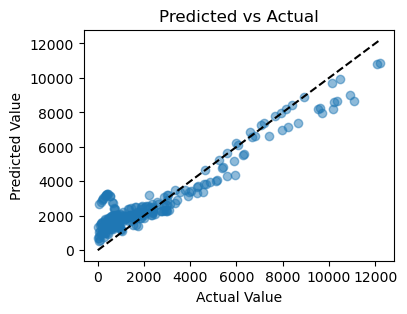

Linear Regression Formula:
y = ([-0.08871649  0.23634228 -0.10517846  0.00869489  0.07394957 -0.08134282
 -0.21769461  0.23920824  0.24556331  0.03700394 -0.18667397] * x1) + ([ 0.011924   -0.05852012 -0.06750439 -0.2667017   0.18666959 -0.03033805
 -0.20715293  0.25949144  0.13661397  0.05746118  0.17170233] * x2) + ([ 0.12911257 -0.16838296 -0.01255689  0.28087744 -0.15549055  0.02201434
  0.05018826  0.08936465 -0.21038754  0.23249935  0.2459641 ] * x3) + ([ 0.07521842 -0.14482789  0.01422255  0.23814285  0.24739487  0.2920759
 -0.0224256  -0.03020128  0.19960228 -0.38701034  0.00492753] * x4) + ([ 0.09971705  0.03474957 -0.2307094  -0.21647108 -0.23455955  0.09824575
 -0.07753024 -0.13458355  0.13274248 -0.29086992  0.2702953 ] * x5) + ([ 0.15856044  0.14974748  0.08137392  0.21224067 -0.22015484 -0.13408235
  0.1400653  -0.00914709 -0.18957312 -0.08448815 -0.25707263] * x6) + ([ 0.01483489  0.17010348 -0.02692142  0.09846321 -0.21252792 -0.10990859
 -0.27121636 -0.09033819  0.4810

In [20]:
# evaluate
test_input = scaler.fit_transform(test_input.cpu().numpy())
test_input = torch.tensor(test_input, dtype=torch.float32)
test_target = torch.tensor(test_target, dtype=torch.float32)
test_input = test_input.to(device)
test_target = test_target.to(device)


#model = RegressionModel(input_size=11, hidden_size=254)
model.load_state_dict(torch.load('/DATA/weight/yolov8_all_adam_lr001_ep200_bc2_relu_2.pth'))

model.eval().to(device)
with torch.no_grad():
    
    predicted = model(test_input).flatten()
    mse = criterion(predicted, test_target)
    print(f'Mean Squared Error: {mse.item():.4f}')
    for pred, actual in zip(predicted.tolist(), test_target.tolist()):
        print(f'Predicted: {pred:.2f}, Actual: {actual}')
        
    predicted = predicted.cpu().numpy()
    test_target = test_target.cpu().numpy()
    plt.figure(figsize=(4, 3))
    plt.scatter(test_target, predicted, alpha=0.5)
    plt.title('Predicted vs Actual')
    plt.xlabel('Actual Value')
    plt.ylabel('Predicted Value')
    plt.plot([test_target.min(), test_target.max()], [test_target.min(), test_target.max()], 'k--')  # 대각선
    plt.show()
    
    
# 모델의 가중치와 편향 추출
model_state_dict = model.state_dict()
weights = model_state_dict['fc1.weight'].cpu().numpy()
biases = model_state_dict['fc1.bias'].cpu().numpy()

print("Linear Regression Formula:")
print("y = ", end="")
for i in range(len(weights)):
    if i > 0:
        print(" + ", end="")
    print(f"({weights[i]} * x{i+1})", end="")
print(f" + {biases[0]}")


LightGBM

In [66]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor(device='gpu')
lgb.fit(train_input, train_target)

[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 368
[LightGBM] [Info] Number of data points in the train set: 1130, number of used features: 4
[LightGBM] [Info] Using GPU Device: Tesla V100-PCIE-32GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 4 dense feature groups (0.00 MB) transferred to GPU in 0.000534 secs. 0 sparse feature groups
[LightGBM] [Info] Start training from score 2338.665623


LGBMRegressor(device='gpu')

In [68]:
from sklearn.metrics import mean_squared_error

pred = lgb.predict(val_input)
mse = mean_squared_error(val_target, pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 68098.8429707057


In [27]:
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor(random_state=42)
model.fit(train_input, train_target)

HistGradientBoostingRegressor(random_state=42)

In [29]:
y_pred = model.predict(test_input.cpu())

mse = mean_squared_error(test_target, y_pred)

print("Mean Squared Error:", mse)
print(f"RMSE: {np.sqrt(mse)}")

Mean Squared Error: 24637.23516202045
RMSE: 156.9625278912787
